<h1> data science ?</h1>

We spend a lot of money on education every year! In general, we believe that the more we spend, the better our schools are and the better our students do. But do we really know that?

To adress these questions, we will spend today looking at a US education dataset and see what we can learn about indicators of student performance. In particular, we want to answer the question: are revenue, expenditure, or enrollment useful indicators to predict student performance on national exams?

## data poking

We start off by importing our data and seeing what we've got:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('states_edu.csv')

In [3]:
df.shape

(1715, 25)

We downloaded this data off of <a href="https://www.kaggle.com/noriuk/us-education-datasets-unification-project">Kaggle</a>, where they provide us with a _data dictionary_. A data dictionary describes a dataset -- it typically defines the columns, describes special values, explains missing values, etc.

From our data dictionary, we are given that this dataset describes "K-12 financial, enrollment, and achievement data in one place". Each row is one state in one year, and includes variables for revenue categories, expenditure types, enrollment numbers, and exam scores.

In [4]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [5]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

## data cleanup

In [6]:
# let's rename our columns to make them more intuitive
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

In [7]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


Looking closer at the data, there are a lot of 'NaN' values... what are those?

In [8]:
# this is a numpy value which represents misisng or invalid data (not-a-number)
np.NaN

nan

In [9]:
# it is treated as a float, so it is easily compatible with numpy and pandas
type(np.NaN)

float

We can easily find and describe missing values with pandas

In [10]:
# this will print the number of missing values in each column
df.isna().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL_ALL_EST                   491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
ENROLL_PREK                      173
ENROLL_KINDER                     83
ENROLL_4                          83
ENROLL_8                          83
ENROLL_12                         83
ENROLL_PRIMARY                   695
ENROLL_HS                        644
ENROLL_ALL                        83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [11]:
# this will print the number of valid values in each column
df.notna().sum()

PRIMARY_KEY                     1715
STATE                           1715
YEAR                            1715
ENROLL_ALL_EST                  1224
TOTAL_REVENUE                   1275
FEDERAL_REVENUE                 1275
STATE_REVENUE                   1275
LOCAL_REVENUE                   1275
TOTAL_EXPENDITURE               1275
INSTRUCTION_EXPENDITURE         1275
SUPPORT_SERVICES_EXPENDITURE    1275
OTHER_EXPENDITURE               1224
CAPITAL_OUTLAY_EXPENDITURE      1275
ENROLL_PREK                     1542
ENROLL_KINDER                   1632
ENROLL_4                        1632
ENROLL_8                        1632
ENROLL_12                       1632
ENROLL_PRIMARY                  1020
ENROLL_HS                       1071
ENROLL_ALL                      1632
AVG_MATH_4_SCORE                 565
AVG_MATH_8_SCORE                 602
AVG_READING_4_SCORE              650
AVG_READING_8_SCORE              562
dtype: int64

In [12]:
# notice that pandas will often ignore missing values by default
df.count()

PRIMARY_KEY                     1715
STATE                           1715
YEAR                            1715
ENROLL_ALL_EST                  1224
TOTAL_REVENUE                   1275
FEDERAL_REVENUE                 1275
STATE_REVENUE                   1275
LOCAL_REVENUE                   1275
TOTAL_EXPENDITURE               1275
INSTRUCTION_EXPENDITURE         1275
SUPPORT_SERVICES_EXPENDITURE    1275
OTHER_EXPENDITURE               1224
CAPITAL_OUTLAY_EXPENDITURE      1275
ENROLL_PREK                     1542
ENROLL_KINDER                   1632
ENROLL_4                        1632
ENROLL_8                        1632
ENROLL_12                       1632
ENROLL_PRIMARY                  1020
ENROLL_HS                       1071
ENROLL_ALL                      1632
AVG_MATH_4_SCORE                 565
AVG_MATH_8_SCORE                 602
AVG_READING_4_SCORE              650
AVG_READING_8_SCORE              562
dtype: int64

One way we can deal with missing values is by dropping rows with any null value

In [13]:
# by default, dropna will remove all rows with at least 1 nan
df.dropna()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,57323.0,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,10115.0,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76207.0,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,34070.0,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,493415.0,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,96851.0,95221.0,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,82404.0,79483.0,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,19814.0,20426.0,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,60999.0,61084.0,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0


Dropping rows with any nan leaves us only 355 rows -- do we actually need all our data to be complete? Which rows are actually important?

That depends on what you want to do with the data! 

Let's say I have a sister in 7th grade so I am particularly interested in learning how well 8th graders read.

In [14]:
# I want all my rows to have average reading 8 score data, so I remove rows missing AVG_READING_8_SCORE
df.dropna(subset=['AVG_READING_8_SCORE'], inplace=True)

Another way of dealing with missing values is filling them in. 

In our data, we have two columns representing total student enrollment: 'ENROLL_ALL_EST' and 'ENROLL_ALL'. We also have enrollment data divided by school group. Let's see if we can use them to fill each other in.

In [15]:
df.ENROLL_ALL.isna().sum()

75

In [16]:
# first let's check to see if the individual enrollments actually sum up to total enrollment
(df.ENROLL_ALL-df.ENROLL_PREK-df.ENROLL_KINDER-df.ENROLL_PRIMARY-df.ENROLL_HS).describe()

count       433.000000
mean       5375.538106
std       18403.087434
min           0.000000
25%           0.000000
50%           0.000000
75%        1524.000000
max      156439.000000
dtype: float64

In [17]:
# enrollment differences as a percent
((df.ENROLL_ALL-df.ENROLL_PREK-df.ENROLL_KINDER-df.ENROLL_PRIMARY-df.ENROLL_HS)/df.ENROLL_ALL*100).describe()

count    433.000000
mean       0.463191
std        1.143213
min        0.000000
25%        0.000000
50%        0.000000
75%        0.224393
max        7.702014
dtype: float64

In [18]:
df['ENROLL_ALL'] = df['ENROLL_ALL'].fillna(df.ENROLL_PREK+df.ENROLL_PRIMARY+df.ENROLL_HS)

In [19]:
# this didn't actually do anything!
df.ENROLL_ALL.isna().sum()

75

In [20]:
# turns out, data missing ENROLL_ALL is also missing all other enrollment data
df[df.ENROLL_ALL.isna()][['ENROLL_PREK','ENROLL_PRIMARY','ENROLL_HS','ENROLL_ALL_EST']].notna().any()

ENROLL_PREK       False
ENROLL_PRIMARY    False
ENROLL_HS         False
ENROLL_ALL_EST    False
dtype: bool

In [21]:
# but there are rows with enrollment estimates
df[df.ENROLL_ALL_EST.isna()].ENROLL_ALL.notna().sum()

51

In [22]:
# let's see if we can fill these in
((df.ENROLL_ALL - df.ENROLL_ALL_EST)/df.ENROLL_ALL).describe()

count    436.000000
mean       0.025500
std        0.049450
min       -0.096404
25%        0.004371
50%        0.014177
75%        0.031885
max        0.450693
dtype: float64

In [23]:
# since the average error between the enrollments is ~2%, I'm going to go ahead and fill in the missing estimates
df.ENROLL_ALL_EST = df.ENROLL_ALL_EST.fillna(df.ENROLL_ALL)

In [24]:
df[df.ENROLL_ALL_EST.isna()].ENROLL_ALL.notna().sum()

0

What we just did was data cleanup! Most data scientists will tell you that data cleanup and preprocessing will take >60% of the total time for a given project... we just gave you a small taster here but you'll be seeing a lot more of it :)

## feature engineering

Something else you'll see a lot of is feature engineering and selection. This is where we decide what data is actually useful to analyze the problem at hand. 

Here are some common methods of modifying features:

* Standardization
>helps some models account for different magnitude features, e.g. revenue is ~10x bigger than enrollment on average, but that doesn't make it more important
* Binning
>reduces the importance of small differences in data, e.g. exact enrollment probably doesn't matter, but there may still be a difference between 'small', 'medium', and 'large' schools
* Combining features
>combinations of features may matter more than the features on their own, e.g. educational expenditure as a percent of total expenditure is more informative about a state's priorities (states aren't all the same size)


In this case, we know our data is on the state level and also longitudinal (over time). This format introduces a lot of complications. For example, the state of California will obviously spend more than New Jersey becuase they have more people... how can we account for this?

In [25]:
# let's create a new variable which represents expenditure per student
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']

## EDA

Now let's do some EDA (exploratory data analysis)!

First let's look at 8th grade reading score on its own:

Text(0.5, 1.0, 'Distribution of 8th grade reading scores')

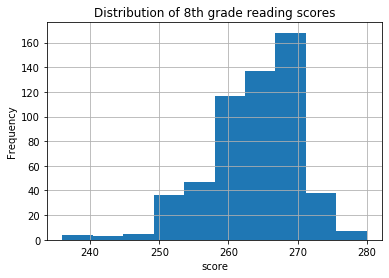

In [26]:
# note - this test is scored out of 500 according to the NAEP website
df.AVG_READING_8_SCORE.hist()
plt.xlabel('score')
plt.ylabel('Frequency')
plt.title('Distribution of 8th grade reading scores')

Text(0.5, 1.0, '8th grade reading score over time')

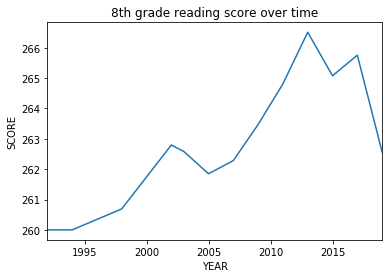

In [27]:
df.groupby('YEAR').AVG_READING_8_SCORE.mean().plot()
plt.ylabel('SCORE')
plt.title('8th grade reading score over time')

Text(0.5, 1.0, '8th grade reading score over time, by state')

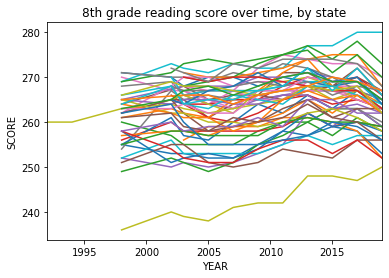

In [28]:
df.set_index('YEAR').groupby('STATE').AVG_READING_8_SCORE.plot()
plt.ylabel('SCORE')
plt.title('8th grade reading score over time, by state')

What other variables are related to 8th grade reading?

Text(0, 0.5, '8th grade reading score')

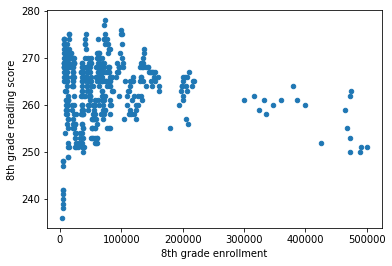

In [29]:
df.plot.scatter(x='ENROLL_8',y='AVG_READING_8_SCORE')
plt.xlabel('8th grade enrollment')
plt.ylabel('8th grade reading score')

Text(0, 0.5, '8th grade reading score')

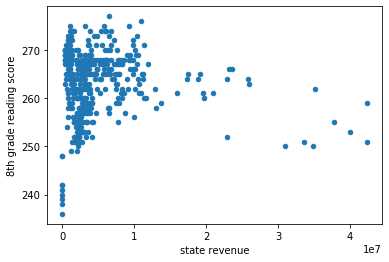

In [30]:
df.plot.scatter(x='STATE_REVENUE',y='AVG_READING_8_SCORE')
plt.xlabel('state revenue')
plt.ylabel('8th grade reading score')

Text(0, 0.5, '8th grade reading score')

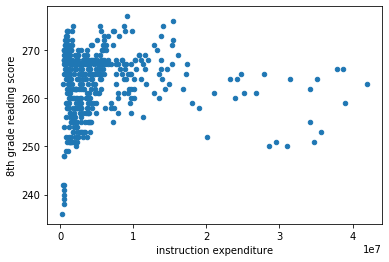

In [31]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE',y='AVG_READING_8_SCORE')
plt.xlabel('instruction expenditure')
plt.ylabel('8th grade reading score')

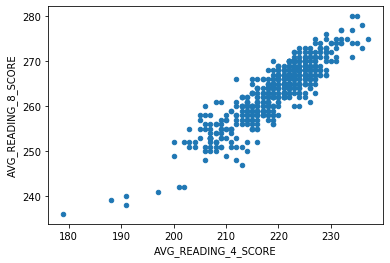

In [32]:
df.plot.scatter(x='AVG_READING_4_SCORE',y='AVG_READING_8_SCORE')

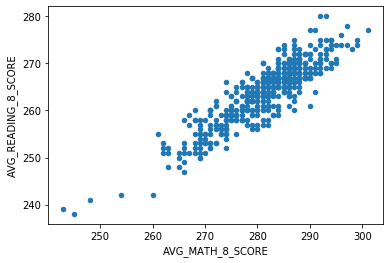

In [33]:
df.plot.scatter(x='AVG_MATH_8_SCORE',y='AVG_READING_8_SCORE')

So now that we know a bit about the data, what do we want to do with it? How am I going to frame this as a _machine learning_ project?

### Now a quick intro to machine learning!

Unfortunately, I can't teach machine learning in a Saturday afternoon :( For this tutorial, we're going to practice a simple _supervised learning_ problem.

**Machine learning workflow:**
<img src=https://miro.medium.com/proxy/1*KzmIUYPmxgEHhXX7SlbP4w.jpeg width=500></img>

**Supervised learning:**
<img src=https://miro.medium.com/max/1050/1*-fniNC8gWI34qLAiBzgGZA.png width=800></img>

So how do we frame our research question as a ML problem?

I already said I'm most interested in 8th grade reading scores, so I want to make that my outcome variable (i.e. what I'm trying to predict). Based on my background knowledge as well as EDA from earlier steps, I think that 'TOTAL_REVENUE', 'ENROLL_8', 'YEAR', and 'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT' would be interesting predictors to look at, so I will pick those as my input features.

**Regression**

In [34]:
# test_train_split randomly splits the data into two parts -- 
# one for training the model (it uses this data to learn patterns)
# and one for testing the model (to make sure it performs well on data it hasn't seen before)
from sklearn.model_selection import train_test_split

In [35]:
X = df[['TOTAL_REVENUE','ENROLL_8','SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT','YEAR']].dropna()
y = df.loc[X.index]['AVG_READING_8_SCORE']

In [36]:
# the test_size parameter defines what % of data is set aside for testing
# random_state ensures that I get the same results each time I run the code
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

Now to create and train a model! For simplicity, I'm going to use sklearn's LinearRegression.

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
model = LinearRegression()

In [39]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

What we are doing here is called _multilinear regression_. This just means that we are using multiple input variables to predict our outcome variable.

Let's say there are $k$ of these variables, named $x_1$ through $x_k$ (here, I have $k=4$, $x_1$ = total_revenue, $x_2$ = enroll_8, etc.)


$y_{predicted} = intercept + coef[0] * x_1 + coef[1] * x_2 + ... + coef[k-1] * x_k$

Notice there are exactly $k$ coefficients as well. The way we interpret each coefficient is relative to the step size of the associated variable, with all other variables held constant. For example, if $coef[0]=20$, we say: 
'with all other variables held constant, a $1 change in total revenue results in a 20-point increase in reading score, on average'. 

In [40]:
print(model.intercept_)
print(model.coef_)

-48.129897013794164
[ 3.47321936e-07 -5.75631635e-05 -2.00997219e-01  1.55622456e-01]


In [41]:
# R**2 value describes how well a linear model fits the data
model.score(X_test, y_test)

0.10015613544997048

In [42]:
# mean error
np.mean(model.predict(X_test)-y_test)

-0.639953216280441

In [43]:
# mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))

5.4269737516399195

In [44]:
# root mean squared error -- penalizes large errors
np.mean((model.predict(X_test)-y_test)**2)**0.5

6.604929790061935

Visualizing data in multiple dimensions is really hard, both technically and intuitively. Below, we try to understand our performance by visualizing one variable at a time. Like we said before, when we look at one variable, we assume all others are held constant. This is not typically true in practice, however, so some of our results may look strange...

Text(0, 0.5, 'Reading 8 score')

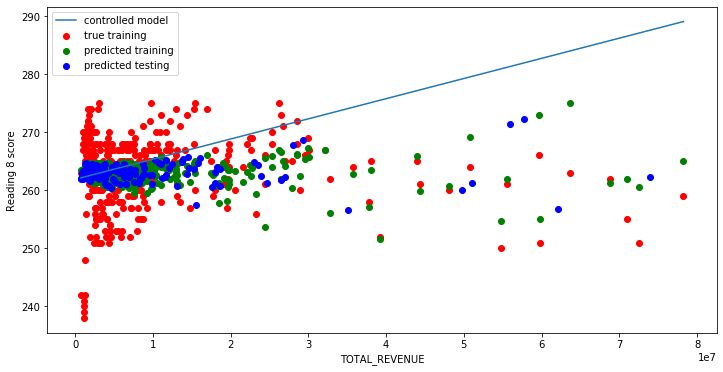

In [45]:
# quickly visualize results
col_name = 'TOTAL_REVENUE'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),100)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Reading 8 score')

In this plot, we also had to modify the predicted intercept. Since the intercept is typically the predicted value with all values being zero, we obviously can't use that as our intercept in plotting. Instead, we modified the intercept such that the first predicted point is exactly correct. 

**Classification**

I can also frame this as a classification problem. Instead of predicting the exact average score, can I predict if 8th graders in a state pass 'basic' level on the reading exam in a particular year.

In [46]:
# NAEP grade 8 reading cutoffs: basic 243, proficient 281
y = df.loc[X.index]['AVG_READING_8_SCORE']>260

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

I'm using the k-nearest neighbors classifier.

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
model = KNeighborsClassifier(n_neighbors=3)

In [54]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [55]:
from sklearn.metrics import plot_confusion_matrix

# confusion matrix shows the all results by how they were classified
plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

In [56]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [57]:
# accuracy score
accuracy_score(y_test, model.predict(X_test))

0.6412213740458015

In [58]:
# recall / sensitivity
recall_score(y_test, model.predict(X_test))

0.7849462365591398

In [59]:
# precision / specificity
precision_score(y_test, model.predict(X_test))

0.73